<DIV ALIGN=CENTER>

# Text Mining Example Problem (Solution)
## Professor Robert J. Brunner
  
</DIV>  
-----
-----

In [7]:
import pickle

with open('/home/data_scientist/data/train_m.p', 'rb') as fin:
    train = pickle.load(fin)

with open('/home/data_scientist/data/test_m.p', 'rb') as fin:
    test = pickle.load(fin)

print("Number of training samples = {0}".format(len(train['data'])))
print("Number of testing samples  = {0}".format(len(test['data'])))

Number of training samples = 1500
Number of testing samples  = 500


In [8]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words = 'english')
train_counts = cv.fit_transform(train['data'])
test_data = cv.transform(test['data'])


from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(train_counts, train['target'])

predicted = clf.predict(test_data)

print("NB prediction accuracy = {0:5.1f}%".format(100.0 * clf.score(test_data, test['target'])))

NB prediction accuracy =  79.6%


In [9]:
words = cv.vocabulary_


In [25]:
print(len(words))

35015


In [19]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()
train_tfidf = tfidf_transformer.fit_transform(train_counts)

from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(C=1000).fit(train_tfidf, train['target'])

predicted = clf.predict(test_data)
print("SVM prediction accuracy = {0:5.1f}%".format(100.0 * clf.score(test_data, test['target'])))


SVM prediction accuracy =  83.4%


In [23]:
%matplotlib inline

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white", context='paper', font='monospace')

# Convenience function to plot confusion matrix

# This method produces a colored heatmap that displays the relationship
# between predicted and actual types from a machine leanring method.

def confusion(test, predict, title):

    f, ax = plt.subplots(figsize=(12, 8))

    # Make a 2D histogram from the test and result arrays
    pts, xe, ye = np.histogram2d(test, predict, bins=2)

    # For simplicity we create a new DataFrame
    pd_pts = pd.DataFrame(pts.astype(int))
    
    # Display heatmap and add decorations
    hm = sns.heatmap(pd_pts, annot=True, fmt="d")
    hm.axes.set_title(title)
    
    return None

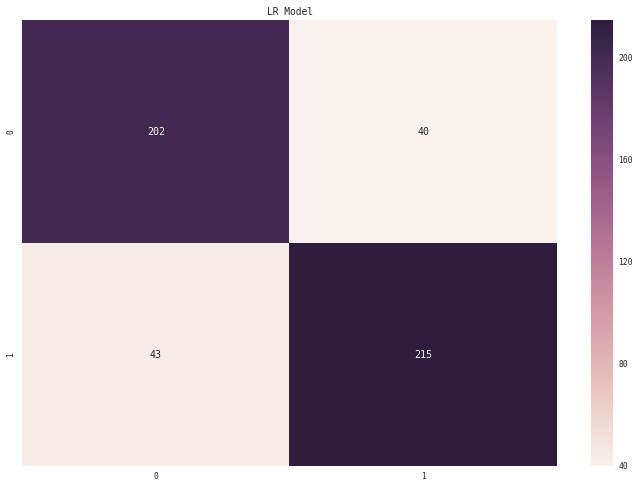

In [24]:
confusion(test['target'], predicted, 'LR Model')

### Return to the [Week 4 Index](index.ipynb).

-----